In [1]:
import pandas as pd 
import plotly.offline as py
import plotly.express as px

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta



In [84]:
data=pd.read_csv('bike_data3.csv')


In [85]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,Clear,3.28,3.0014,81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,Clear,2.34,1.9982,80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,Clear,2.34,1.9982,80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,Clear,3.28,3.0014,75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,Clear,3.28,3.0014,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,Mist�,4.22,1.0016,60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,Mist�,4.22,1.0016,60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,Clear,4.22,1.0016,60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,Clear,4.22,1.9982,56,0.1343,13,48,61


In [86]:
data = data.drop(['instant'],axis=1)

In [87]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2011,1,0,1,0,0,6,0,Clear,3.28,3.0014,81,0.0000,3,13,16
1,01-01-2011,1,0,1,1,0,6,0,Clear,2.34,1.9982,80,0.0000,8,32,40
2,01-01-2011,1,0,1,2,0,6,0,Clear,2.34,1.9982,80,0.0000,5,27,32
3,01-01-2011,1,0,1,3,0,6,0,Clear,3.28,3.0014,75,0.0000,3,10,13
4,01-01-2011,1,0,1,4,0,6,0,Clear,3.28,3.0014,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31-12-2012,1,1,12,19,0,1,1,Mist�,4.22,1.0016,60,0.1642,11,108,119
17375,31-12-2012,1,1,12,20,0,1,1,Mist�,4.22,1.0016,60,0.1642,8,81,89
17376,31-12-2012,1,1,12,21,0,1,1,Clear,4.22,1.0016,60,0.1642,7,83,90
17377,31-12-2012,1,1,12,22,0,1,1,Clear,4.22,1.9982,56,0.1343,13,48,61


In [90]:
data.weathersit = pd.Categorical(data.weathersit)
data['weathersituation'] = data.weathersit.cat.codes
#data = data.drop(['weathersit'],axis=1)

In [88]:
data['season'] = data['season'].map({0:'spring', 1:'summer', 2:'fall', 3:'winter'})

In [91]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weathersituation
0,01-01-2011,summer,0,1,0,0,6,0,Clear,3.28,3.0014,81,0.0000,3,13,16,0
1,01-01-2011,summer,0,1,1,0,6,0,Clear,2.34,1.9982,80,0.0000,8,32,40,0
2,01-01-2011,summer,0,1,2,0,6,0,Clear,2.34,1.9982,80,0.0000,5,27,32,0
3,01-01-2011,summer,0,1,3,0,6,0,Clear,3.28,3.0014,75,0.0000,3,10,13,0
4,01-01-2011,summer,0,1,4,0,6,0,Clear,3.28,3.0014,75,0.0000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31-12-2012,summer,1,12,19,0,1,1,Mist�,4.22,1.0016,60,0.1642,11,108,119,2
17375,31-12-2012,summer,1,12,20,0,1,1,Mist�,4.22,1.0016,60,0.1642,8,81,89,2
17376,31-12-2012,summer,1,12,21,0,1,1,Clear,4.22,1.0016,60,0.1642,7,83,90,0
17377,31-12-2012,summer,1,12,22,0,1,1,Clear,4.22,1.9982,56,0.1343,13,48,61,0


# Exploring the data and visualising

C:\Users\mahesh\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



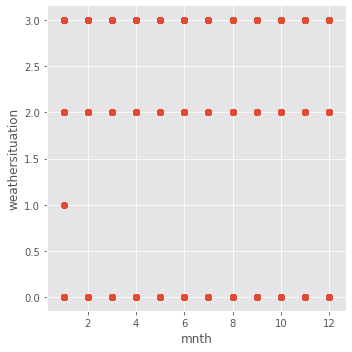

In [112]:
vis3 = sns.lmplot(x='mnth',y='weathersituation',data=data,size = 5, fit_reg=False)
#%matplotlib inline

weathersituation 0= clear
                 1=cloudy
                 2=mist
                 3=rainy

# in the above plot we can notice most of the bikes rented out in clear weather condition 

In [38]:
data.describe()

,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersituation
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,15.358397,15.401157,62.722884,0.190098,35.676218,153.786869,189.463088,0.768053
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,9.050138,11.342114,19.292983,0.122340,49.305030,151.357286,181.387599,1.091351
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,7.980000,5.997800,48.000000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,15.500000,15.996800,63.000000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,23.020000,24.999200,78.000000,0.253700,48.000000,220.000000,281.000000,2.000000
max,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,39.000000,50.000000,100.000000,0.850700,367.000000,886.000000,977.000000,3.000000


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
dteday              17379 non-null object
season              13147 non-null object
yr                  17379 non-null int64
mnth                17379 non-null int64
hr                  17379 non-null int64
holiday             17379 non-null int64
weekday             17379 non-null int64
workingday          17379 non-null int64
weathersit          17379 non-null category
temp                17379 non-null float64
atemp               17379 non-null float64
hum                 17379 non-null int64
windspeed           17379 non-null float64
casual              17379 non-null int64
registered          17379 non-null int64
cnt                 17379 non-null int64
weathersituation    17379 non-null int8
dtypes: category(1), float64(3), int64(10), int8(1), object(2)
memory usage: 2.0+ MB


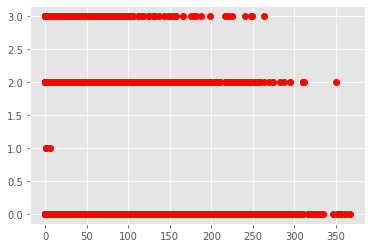

In [113]:
#%matplotlib inline
plt.plot(data['casual'],data['weathersituation'],'ro')

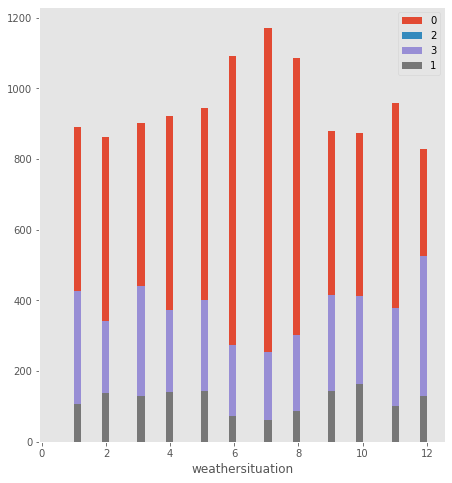

In [119]:
plt.figure(figsize=(16,8))

cols = ['weathersituation'] 
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    data.groupby(cols[i])['mnth'].hist(bins=50,grid=False)
    plt.xlabel(cols[i])
    plt.legend(data[cols[i]].unique())

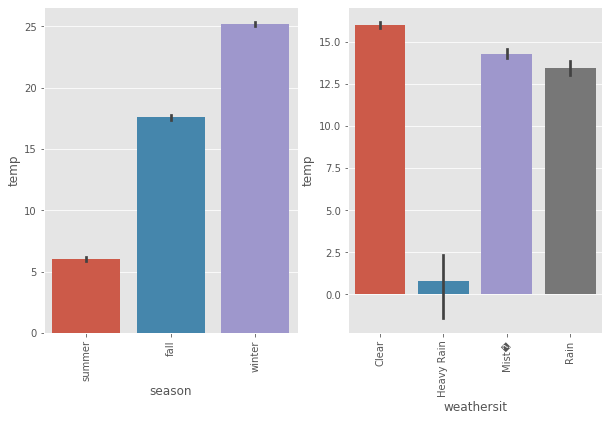

In [120]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 2, figsize=(10,6))

cols = ['season', 'weathersit']
for i in range(len(cols)):
    sns.barplot(x=cols[i], y='temp', data=data, ax=axs[i])
    axs[i].xaxis.set_tick_params(rotation=90)

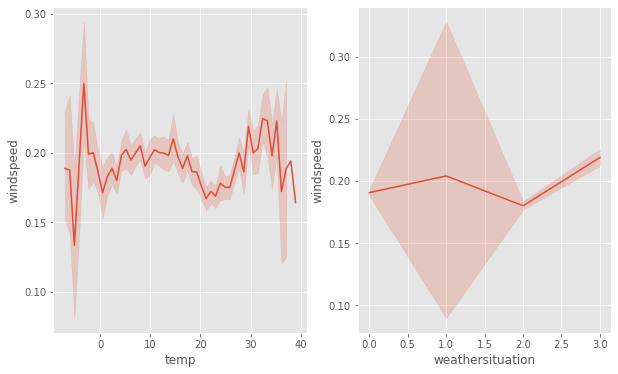

In [121]:
num_cols = [ 'temp', 'weathersituation']
fig, axs = plt.subplots(1, 2, figsize=(10,6))

i = 0
for col in num_cols:
    sns.lineplot(x=col, y='windspeed', data=data, ax=axs[i])
    i+=1

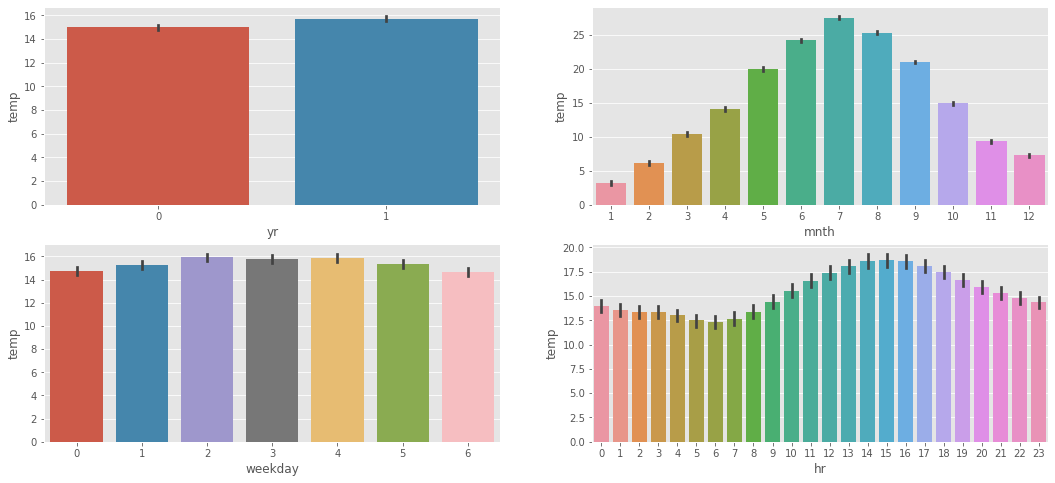

In [137]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 8)

sns.barplot(data=data, x="yr", y="temp", ax=ax1)
sns.barplot(data=data, x="mnth", y="temp", ax=ax2)
sns.barplot(data=data, x="weekday", y="temp", ax=ax3)
sns.barplot(data=data, x="hr", y="temp", ax=ax4)
plt.show()

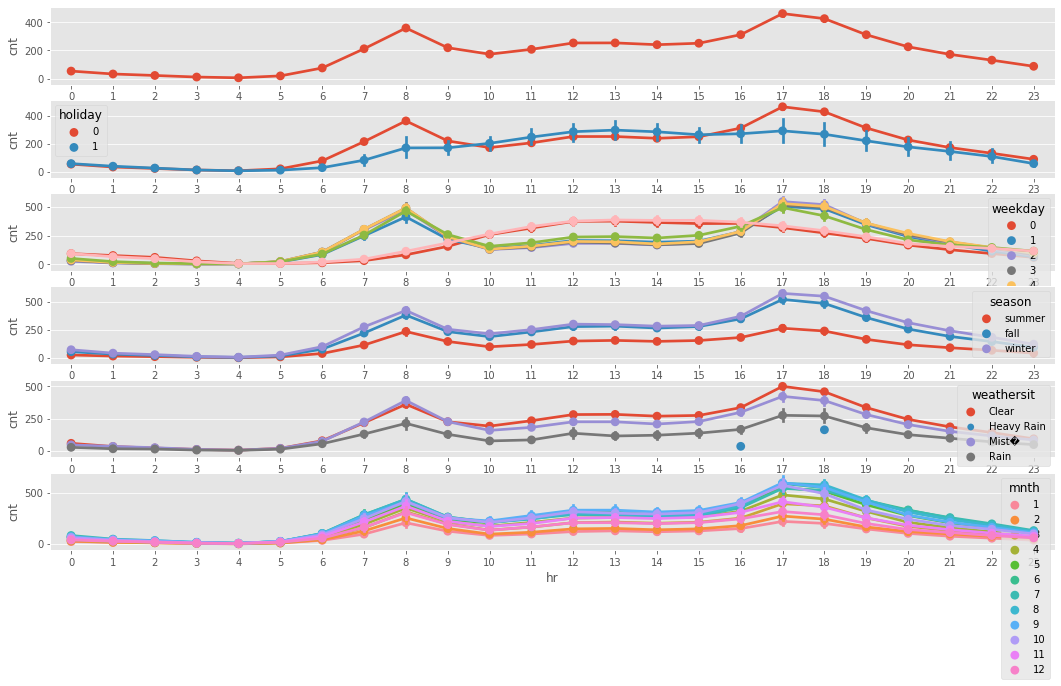

In [143]:
figure, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1)

figure.set_size_inches(18,10)

sns.pointplot(data=data, x="hr", y="cnt", ax=ax1)
sns.pointplot(data=data, x="hr", y="cnt", hue="holiday", ax=ax2)
sns.pointplot(data=data, x="hr", y="cnt", hue="weekday", ax=ax3)
sns.pointplot(data=data, x="hr", y="cnt", hue="season", ax=ax4)
sns.pointplot(data=data, x="hr", y="cnt", hue="weathersit", ax=ax5)
sns.pointplot(data=data, x="hr", y="cnt", hue="mnth", ax=ax6)
plt.show()

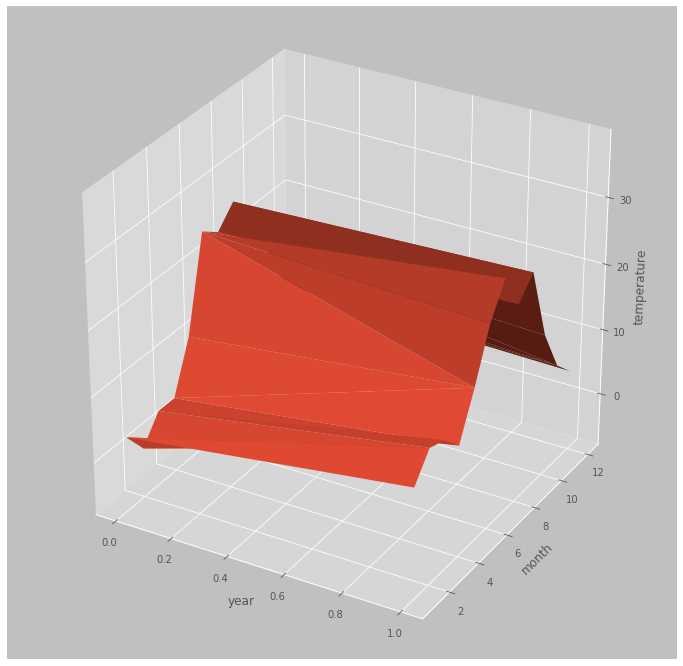

In [169]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d',facecolor ="silver")
X, Y, Z = data['yr'],data['mnth'],data['temp']
ax.plot_trisurf(X, Y, Z)

ax.set_xlabel('year')
ax.set_ylabel('month')
ax.set_zlabel('temperature')

plt.show() 